In [5]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\Users\\sneha\\OneDrive\\Desktop\\song_popularity_data.csv")
df.head()





[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,artist_follower_count,genre,tempo,key,duration,collab,release_month,song_mood_score,hit
0,1937477,4,122.24,2,152,0,8,-0.93,0
1,9643604,1,147.77,11,235,0,3,0.50,1
2,4087168,0,89.20,1,261,0,4,0.49,0
3,9676761,0,126.90,11,176,0,8,-0.09,0
4,734646,4,73.33,11,199,0,2,-0.14,0


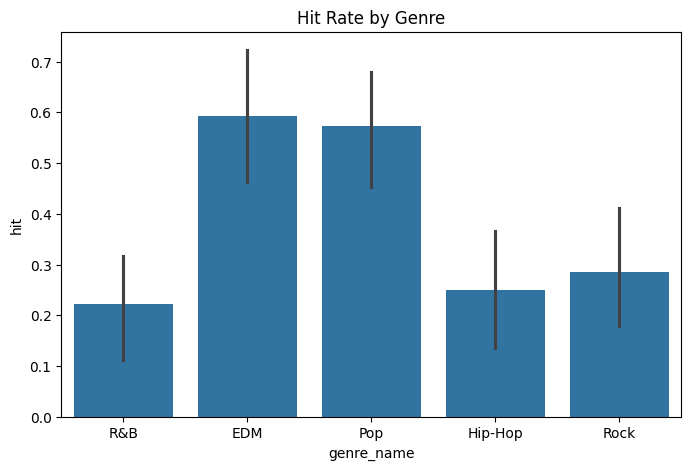

In [6]:
# Map genre numbers to names
genre_map = {0: "Pop", 1: "EDM", 2: "Hip-Hop", 3: "Rock", 4: "R&B"}
df["genre_name"] = df["genre"].map(genre_map)
# Genre vs Hit rate
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="genre_name", y="hit")
plt.title("Hit Rate by Genre")
plt.show()


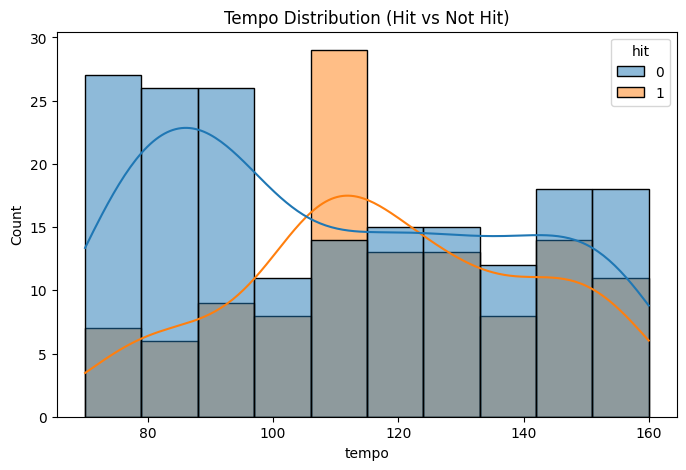

In [7]:
# Tempo Distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="tempo", hue="hit", kde=True)
plt.title("Tempo Distribution (Hit vs Not Hit)")
plt.show()


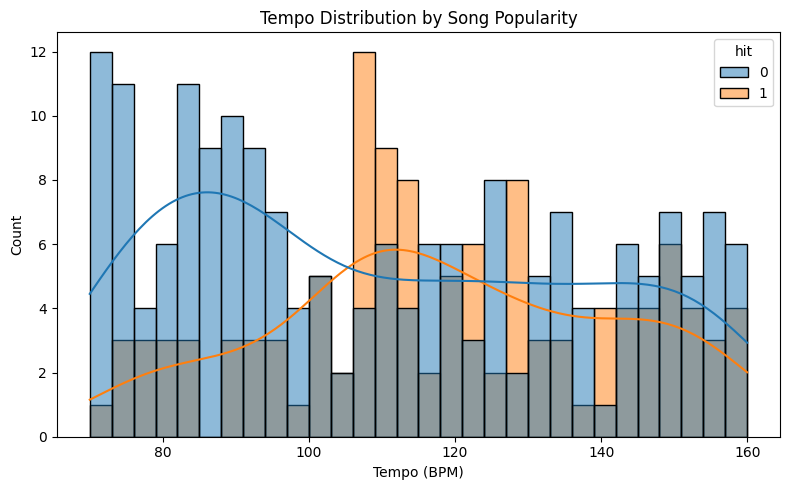

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='tempo', hue='hit', bins=30, kde=True)
plt.title("Tempo Distribution by Song Popularity")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


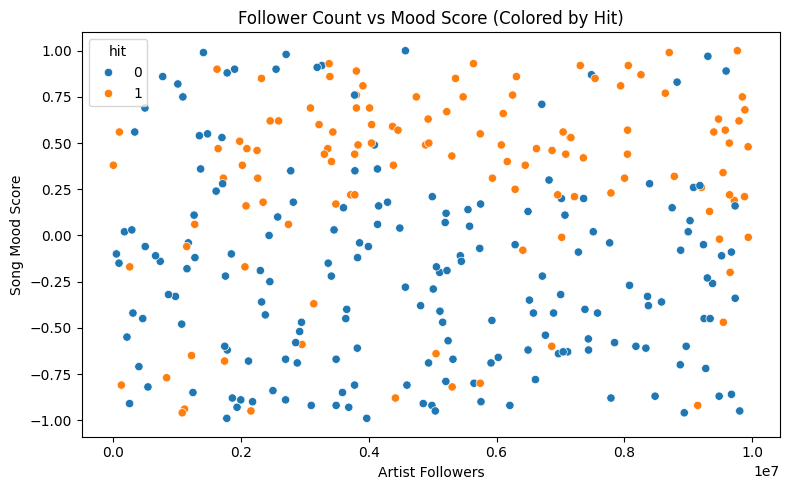

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='artist_follower_count', y='song_mood_score', hue='hit')
plt.title("Follower Count vs Mood Score (Colored by Hit)")
plt.xlabel("Artist Followers")
plt.ylabel("Song Mood Score")
plt.tight_layout()
plt.show()


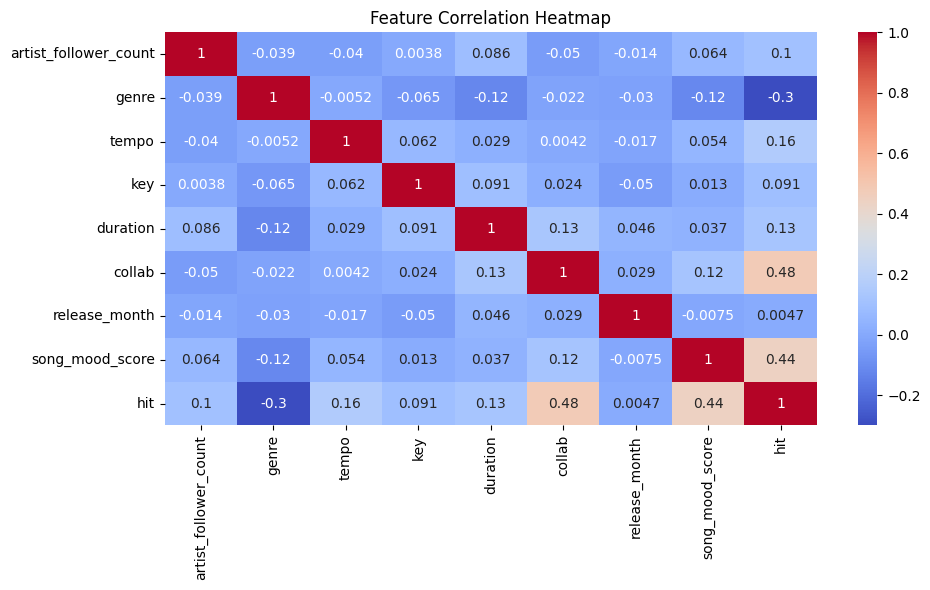

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop('genre_name', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Drop label and genre name
X = df.drop(['hit', 'genre_name'], axis=1)
y = df['hit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Not Hit", "Hit"]))


Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

     Not Hit       0.91      0.94      0.93        34
         Hit       0.92      0.88      0.90        26

    accuracy                           0.92        60
   macro avg       0.92      0.91      0.91        60
weighted avg       0.92      0.92      0.92        60



In [12]:
import joblib
joblib.dump(model, "song_hit_predictor_model.pkl")


['song_hit_predictor_model.pkl']

In [ ]:
import numpy as np

genre_map = {"Pop": 0, "EDM": 1, "Hip-Hop": 2, "Rock": 3, "R&B": 4}
model = joblib.load("song_hit_predictor_model.pkl")

def predict_song():
    print("Enter song details to predict:")
    followers = int(input("Artist followers: "))
    genre = input("Genre (Pop/EDM/Hip-Hop/Rock/R&B): ")
    tempo = float(input("Tempo (BPM): "))
    key = int(input("Key (0–11): "))
    duration = int(input("Duration (seconds): "))
    collab = int(input("Collab (0 or 1): "))
    month = int(input("Release Month: "))
    mood = float(input("Mood Score (-1 to 1): "))

    features = np.array([[followers, genre_map[genre], tempo, key, duration, collab, month, mood]])
    result = model.predict(features)[0]
    print("Prediction:", "HIT" if result == 1 else "Not a Hit")

predict_song()


Enter song details to predict:
